In [1]:
%matplotlib notebook

In [2]:
from forced_barotropic_sphere.sphere import Sphere
from forced_barotropic_sphere.solver import Solver
from forced_barotropic_sphere.forcing import Forcing
#import bm_methods.bm_methods
import forced_barotropic_sphere.plotting as plotters
import forced_barotropic_sphere.ensemble_methods as ensemble_methods
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl          # Plotting routines
import matplotlib.pyplot as plt    
import matplotlib.animation as manim
import matplotlib.ticker as mticker
from IPython.display import display, clear_output, HTML, FileLink  # Some technical stuff, used to display animation
#from ipywidgets import FloatProgress
from ipykernel.pylab.backend_inline import flush_figures
import cartopy                   # Map projection stuff
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Test a single model run

100%|████████████████████████████████████████| 500/500 [00:01<00:00, 333.68it/s]


<IPython.core.display.Javascript object>


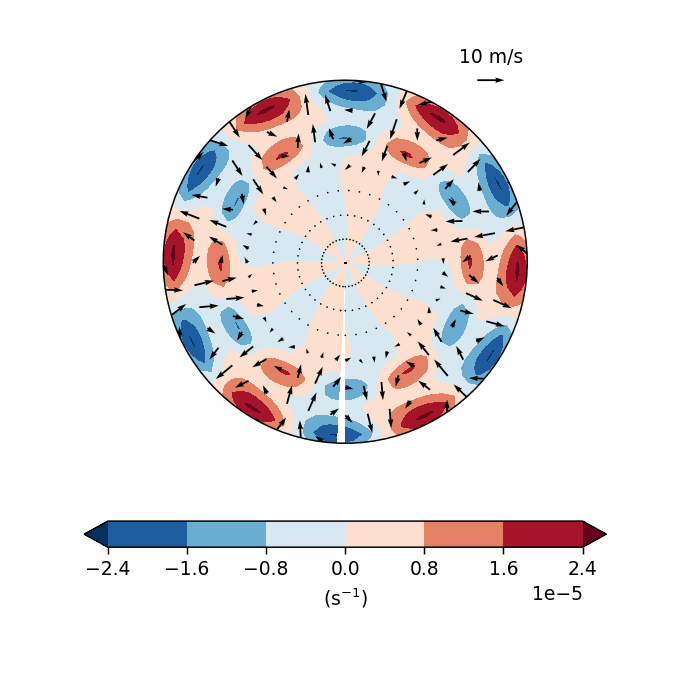

<IPython.core.display.Javascript object>


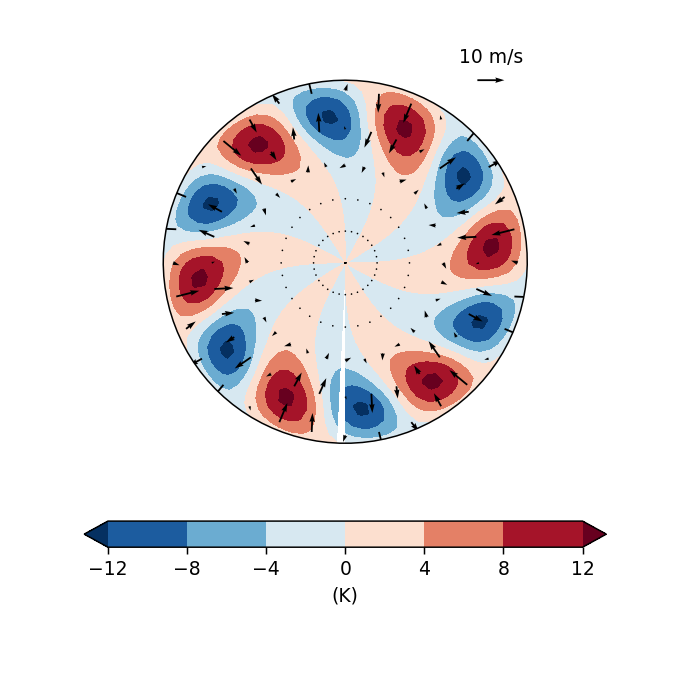

In [7]:
dt = 1200 #time between integration stesp (seconds)
Nt = 500 #number of integration steps
T= 500*1200 #total integration time

#T42 resolution
nlat=64; nlon=128
st = Sphere(nlat,nlon)
#st.held_1985()
F = Forcing(st,dt,T)

k0=6
vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)
thetap = np.zeros(vortp.shape)
ics = np.array([vortp,thetap])

#this is annoying but the forcing is generated as a separate full timeseries
#so that ensemble members can share information in the case of stochastic eddys w/ rednoise
#forcing_tseries=F.generate_gaussianblob_tseries()
forcing_tseries = F.generate_stocheddy_tseries()
#print(forcing_tseries.shape)

sln = Solver(st, forcing=F, ofreq=2, ics= ics).integrate_dynamics(linear=True)
tidx=200
f,ax=plotters.plot_vort(sln.isel(time=tidx))
f,ax=plotters.add_windvecs(f,ax, sln.isel(time=tidx), thin=3)
f,ax=plotters.plot_thetap(sln.isel(time=tidx))
f,ax=plotters.add_windvecs(f,ax, sln.isel(time=tidx), thin=4)

# Testing some ensemble methods

In [4]:
#T42 resolution
nlat=64; nlon=128
st = Sphere(nlat,nlon, U=12.)
tstep = 1200 #seconds
Nt = tstep*100
num_members= 5 #num of members in the ensemble

#thetap will not have a perturbation at t=0, other than that induced by forcing type
thetap = np.zeros((nlat,nlon))
vortp = np.zeros((nlat,nlon))
ics = np.array([vortp,thetap])
ensemble = ensemble_methods.integrate_ensemble(64,128,tstep=tstep, T=Nt, ofreq=5,ics=ics,
                                               forcing_type='gaussian', n_ens=5, nonlinear=True, vortpert=1e-6)

TypeError: Solver.__init__() got an unexpected keyword argument 'tstep'

In [ ]:
tidx=20
f,ax=plotters.plot_theta_ensspread(ensemble.isel(time=tidx))
f,ax=plotters.add_windvecs(f,ax, ensemble.isel(time=tidx, ens_mem=3), thin=3)

In [ ]:
tidx=ensemble.time.shape[0]-1
f,axs=plotters.plot_vortp_theta(ensemble.isel(time=tidx, ens_mem=3))